In [407]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
np.random.seed(10)

In [408]:
filepath="data/pima-indians-diabetes.xls"
all_df=pd.read_excel(filepath)

In [409]:
cols=['Outcome','Pregnancies','Glucose','Blood','Skin','Insulin',
      'BMI','Diabetes', 'Age']
all_df=all_df[cols]

In [410]:
all_df[:5]

,Outcome,Pregnancies,Glucose,Blood,Skin,Insulin,BMI,Diabetes,Age
0,1,6,148,72,35,0,33.6,0.627,50
1,0,1,85,66,29,0,26.6,0.351,31
2,1,8,183,64,0,0,23.3,0.672,32
3,0,1,89,66,23,94,28.1,0.167,21
4,1,0,137,40,35,168,43.1,2.288,33


In [411]:
msk = np.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [412]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 768 train: 616 test: 152


In [413]:
def PreprocessData(raw_df):
    zero_not_accepted = ['Glucose', 'Blood', 'Skin', 'BMI', 'Insulin']       
    for column in zero_not_accepted: 
        mean = int(raw_df[column].mean(skipna=True))
        raw_df[column].replace(0, mean,inplace=True) 
     
    ndarray = raw_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [414]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

/home/cool/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [415]:
train_Features[:2]

array([[0.35294118, 0.67096774, 0.48979592, 0.30434783, 0.08052885,
        0.31492843, 0.23244863, 0.48333333],
       [0.05882353, 0.26451613, 0.42857143, 0.23913043, 0.08052885,
        0.17177914, 0.11429795, 0.16666667]])

In [416]:
train_Label[:2]

array([1., 0.])

In [417]:
test_Features[:2]

array([[0.76923077, 0.77941176, 0.52380952, 0.23404255, 0.11132075,
        0.62025316, 0.26952437, 0.26530612],
       [0.38461538, 0.76470588, 0.5       , 0.25531915, 0.30188679,
        0.23417722, 0.29888432, 0.6122449 ]])

In [418]:
test_Label[:2]

array([1., 1.])

In [419]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN

In [420]:
model = Sequential()

In [421]:
model.add(Embedding(input_dim=8,output_dim=4))

In [422]:
model.add(SimpleRNN(units=3))

In [423]:
model.add(Dense(1, activation = "sigmoid"))

In [424]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, None, 4)           32        
_________________________________________________________________
simple_rnn_19 (SimpleRNN)    (None, 3)                 24        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 4         
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


In [425]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [426]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 554 samples, validate on 62 samples
Epoch 1/30
 - 2s - loss: 0.6898 - acc: 0.6011 - val_loss: 0.6889 - val_acc: 0.5806
Epoch 2/30
 - 0s - loss: 0.6801 - acc: 0.6534 - val_loss: 0.6848 - val_acc: 0.5806
Epoch 3/30
 - 0s - loss: 0.6713 - acc: 0.6534 - val_loss: 0.6816 - val_acc: 0.5806
Epoch 4/30
 - 0s - loss: 0.6629 - acc: 0.6534 - val_loss: 0.6803 - val_acc: 0.5806
Epoch 5/30
 - 0s - loss: 0.6579 - acc: 0.6534 - val_loss: 0.6802 - val_acc: 0.5806
Epoch 6/30
 - 0s - loss: 0.6534 - acc: 0.6534 - val_loss: 0.6806 - val_acc: 0.5806
Epoch 7/30
 - 0s - loss: 0.6508 - acc: 0.6534 - val_loss: 0.6816 - val_acc: 0.5806
Epoch 8/30
 - 0s - loss: 0.6492 - acc: 0.6534 - val_loss: 0.6829 - val_acc: 0.5806
Epoch 9/30
 - 0s - loss: 0.6477 - acc: 0.6534 - val_loss: 0.6838 - val_acc: 0.5806
Epoch 10/30
 - 0s - loss: 0.6472 - acc: 0.6534 - val_loss: 0.6853 - val_acc: 0.5806
Epoch 11/30
 - 0s - loss: 0.6463 - acc: 0.6534 - val_loss: 0.6859 - val_acc: 0.5806
Epoch 12/30
 - 0s - loss: 0.6459 - acc: 

In [427]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

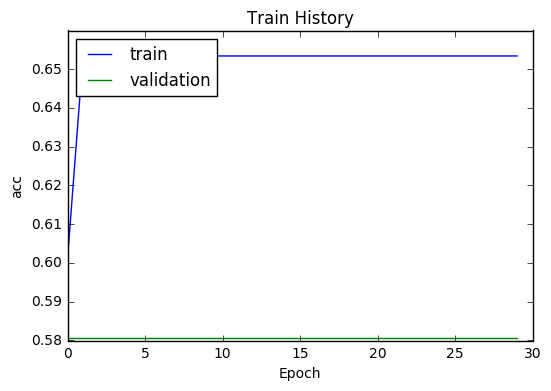

In [428]:
show_train_history(train_history,'acc','val_acc')

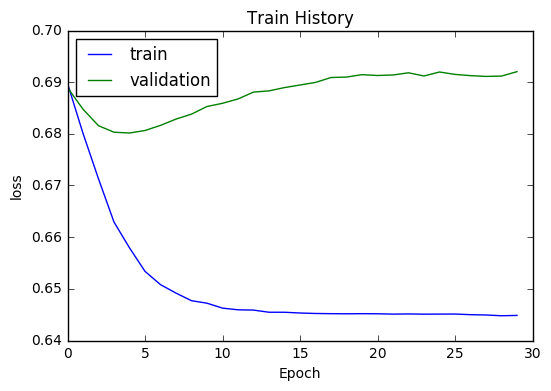

In [429]:
show_train_history(train_history,'loss','val_loss')

In [430]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

152/152 [==============================] - 0s 203us/step


In [431]:
scores[1]

0.6710526347160339